# 1.Load Library


In [1]:
# Install SDK Google Gemini
!pip install -q -U google-generativeai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.1/155.1 kB 4.1 MB/s eta 0:00:00


In [2]:
pip install scikit-fuzzy # Fuzzy library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 14.4 MB/s eta 0:00:00


In [ ]:
pip install gdown

In [3]:
# Library Fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

import matplotlib.pyplot as plt # Visualisasi

import gdown  # Untuk download dataset dari drive
import pandas as pd # Untuk dataframe

# 2.Load dataset

In [4]:
!gdown --id 1Ex_PRFwUMyVTdS2JSbybhN1KkRPoWvso -O dataset.csv


/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Ex_PRFwUMyVTdS2JSbybhN1KkRPoWvso
To: /content/dataset.csv
100% 782k/782k [00:00<00:00, 164MB/s]


In [5]:
df = pd.read_csv('dataset.csv')

# 3.Data Preparation
- Membersihkan data (data kosong, data tidak normal, data salah type)
- Mengecek data mencurigakan


## 3.1. Cek datatype sesuai tidak dengan data seharusnya

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7609 entries, 0 to 7608
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   house_name          7609 non-null   object
 1   location            7609 non-null   object
 2   bedroom_count       7609 non-null   int64 
 3   bathroom_count      7609 non-null   int64 
 4   carport_count       7609 non-null   int64 
 5   price               7609 non-null   int64 
 6   land_area           7609 non-null   int64 
 7   building_area (m2)  7609 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 475.7+ KB
None


In [7]:
# Melihat 5 data teratas
display(df.head())

,house_name,location,bedroom_count,bathroom_count,carport_count,price,land_area,building_area (m2)
0,Rumah 2 Lantai Bagus Sertifikat Hak Milik di M...,"Andir, Bandung",3,2,2,2100000000,137,170
1,Rumah Cantik @ Andir (Sudirman),"Andir, Bandung",3,2,3,4100000000,202,300
2,Jual Cepat Rumah di Maleber Rajawali Bisa Untu...,"Andir, Bandung",5,2,1,3300000000,350,258
3,Rumah minimalis 3 lantai di andir Bandung coco...,"Andir, Bandung",2,2,1,580000000,30,80
4,Jual Rumah Murah Bisa Dijadikan Kos”an Di Jala...,"Andir, Bandung",11,3,0,1300000000,176,176


## 3.2. Cek jumlah kolom yang kosong

In [8]:
# Cek jumlah kolom yang kosong
print(df.isnull().sum())

house_name            0
location              0
bedroom_count         0
bathroom_count        0
carport_count         0
price                 0
land_area             0
building_area (m2)    0
dtype: int64


## 3.3. Rename kolom untuk mempermudah proses

In [9]:
df.rename(columns={'price': 'Harga(Rp)'}, inplace=True);
df.rename(columns={'land_area': 'luas_tanah(m2)'}, inplace=True);
df.rename(columns={'building_area (m2)': 'luas_bangunan(m2)'}, inplace=True);
df.rename(columns={'bedroom_count': 'jml_kamar_tidur'}, inplace=True);
df.rename(columns={'bathroom_count': 'jml_kamar_mandi'}, inplace=True);
df.rename(columns={'carport_count': 'jml_garasi'}, inplace=True);

display(df.head())

,house_name,location,jml_kamar_tidur,jml_kamar_mandi,jml_garasi,Harga(Rp),luas_tanah(m2),luas_bangunan(m2)
0,Rumah 2 Lantai Bagus Sertifikat Hak Milik di M...,"Andir, Bandung",3,2,2,2100000000,137,170
1,Rumah Cantik @ Andir (Sudirman),"Andir, Bandung",3,2,3,4100000000,202,300
2,Jual Cepat Rumah di Maleber Rajawali Bisa Untu...,"Andir, Bandung",5,2,1,3300000000,350,258
3,Rumah minimalis 3 lantai di andir Bandung coco...,"Andir, Bandung",2,2,1,580000000,30,80
4,Jual Rumah Murah Bisa Dijadikan Kos”an Di Jala...,"Andir, Bandung",11,3,0,1300000000,176,176


## 3.4. Cek nilai fitur

In [10]:
df.describe()

,jml_kamar_tidur,jml_kamar_mandi,jml_garasi,Harga(Rp),luas_tanah(m2),luas_bangunan(m2)
count,7609.000000,7609.000000,7609.000000,7.609000e+03,7609.000000,7.609000e+03
mean,4.476935,3.196478,1.374688,4.981947e+09,274.553949,6.424599e+02
std,4.712505,4.104819,1.928083,1.476257e+10,440.553799,3.445898e+04
min,0.000000,0.000000,0.000000,1.200000e+07,6.000000,-2.500000e+02
25%,3.000000,2.000000,0.000000,1.150000e+09,102.000000,1.000000e+02
50%,4.000000,3.000000,1.000000,2.250000e+09,165.000000,1.800000e+02
75%,5.000000,3.000000,2.000000,4.750000e+09,313.000000,3.000000e+02
max,99.000000,99.000000,40.000000,7.350000e+11,11850.000000,3.006000e+06


Terdapat beberapa kolom yang perlu diperhatikan:
- nilai min pada kolom `jml_kamar_tidur` `jml_kamar_mandi` dan `jml_garasi`, bernilai 0 yang tidak mungkin rumah tanpa kamar tidur dan kamar mandi
- nilai negatif dan kecil pada kolom `luas_bangunan(m2)`, dimana nilai tersebut tidak masuk akal untuk luas bangunan.
- nilai pada kolom min `luas_tanah(m2)`, dimana nilai tersebut tidak masuk akal untuk luas tanah yang ada bangunannya.
- baris dengan `jml_kamar_tidur` mencurigakan karena terdapat nilai max 99
- data di mana `luas bangunan` lebih besar dari `luas tanah`
- Karena terdapat properti komersial dan harga yang sangat mahal, akan dihapus untuk menjaga distribusi dan tidak menjadi outlier.

### 3.4.1. Pengecekan nilai min pada kolom `jml_kamar_tidur` `jml_kamar_mandi` dan `jml_garasi`

In [11]:
# Mengecek jumlah baris yang memiliki nilai 0
print("Jumlah data dengan 0 Kamar Tidur:", (df['jml_kamar_tidur'] == 0).sum())
print("Jumlah data dengan 0 Kamar Mandi:", (df['jml_kamar_mandi'] == 0).sum())

Jumlah data dengan 0 Kamar Tidur: 198
Jumlah data dengan 0 Kamar Mandi: 169


In [12]:
# Menghapus baris yang memiliki 0 kamar tidur ATAU 0 kamar mandi
df = df[(df['jml_kamar_tidur'] > 0) & (df['jml_kamar_mandi'] > 0)]

### 3.4.2. Pengecekan nilai negatif dan kecil pada kolom `luas_bangunan(m2)`

In [13]:
# Cek data dengan luas bangunan negatif dan sangat kecil
data_negatif = df[df['luas_bangunan(m2)'] < 10]
display("Data dengan Luas Bangunan Anomali:")
display(data_negatif[['house_name', 'luas_tanah(m2)', 'luas_bangunan(m2)']])

'Data dengan Luas Bangunan Anomali:'

,house_name,luas_tanah(m2),luas_bangunan(m2)
2100,Dijual Rumah Hitung Tanah Saja di Sayap Riau,437,1
2514,Rumah Cantik 2 lantai di Singgasana Karangkamu...,200,-250
2666,Rumah Cantik 2 lantai di Singgasana Karangkamu...,200,-250
5061,Dijual Rumah Tua Hitung Tanah Pusat Kota Karap...,140,1
5222,Dijual Rumah Tua Hitung Tanah Pusat Kota Karap...,140,1


In [14]:
# Menghapus baris dengan indeks 2100, 2514, 2666, 5061, dan 5222, karena data tidak wajar.
df.drop([ 2100, 2514, 2666, 5061, 5222], axis=0, inplace=True)

### 3.4.3. Pengecekan nilai pada kolom min `luas_tanah(m2)`

In [15]:
# Cek data dengan luas tanah terlalu kecil
data_negatif = df[df['luas_tanah(m2)'] < 10]
display("Data dengan Luas Tanah yang kecil:")
display(data_negatif[['house_name', 'luas_tanah(m2)', 'luas_bangunan(m2)']])

'Data dengan Luas Tanah yang kecil:'

,house_name,luas_tanah(m2),luas_bangunan(m2)
5738,Jual cpt MURAH diBumi panyileukan SHM Butuh Re...,6,45


In [16]:
# Menghapus baris dengan indeks 5738, karena data tidak wajar. Dimana luas_bangunan lebih besaar dari luas_tanah
df.drop([5738], axis=0, inplace=True)

### 3.4.4. Melihat 10 baris dengan `jml_kamar_tidur` mencurigakan karena terdapat nilai max 99


In [17]:
top_10_kamar = df.sort_values(by='jml_kamar_tidur').tail(10)
display(top_10_kamar[['house_name', 'location', 'jml_kamar_tidur', 'jml_kamar_mandi', 'jml_garasi', 'Harga(Rp)', 'luas_bangunan(m2)']])

,house_name,location,jml_kamar_tidur,jml_kamar_mandi,jml_garasi,Harga(Rp),luas_bangunan(m2)
2953,Hotel Sky garden bandung nego langsung ownner ...,"Buah Batu, Bandung",50,50,2,19800000000,1700
1359,Hotel / Guest House Ala Kekinian & Instagramab...,"Bandung Kidul, Bandung",50,50,0,28000000000,1700
4463,Dijual Kostan di Jl Cisitu Lama - Bandung,"Coblong, Bandung",52,35,0,10500000000,1250
426,Hotel Aktif Bintang 3 Furnished Dekat Alun Alu...,"Astanaanyar, Bandung",53,60,40,50000000000,3000
686,Dijual hotel mewah aktif strategis Astanaanyar,"Astanaanyar, Bandung",53,60,40,50000000000,3000
3038,Rumah Kost Strategis Furnished Terisi 56 Kamar...,"Buah Batu, Bandung",56,56,6,23000000000,1800
4917,Kost-Gudang Kiaracondong,"Kiaracondong, Bandung",63,12,1,7100000000,400
4561,Rumah Kost Lokasi Dekat Ke Kampus Unpad di Ban...,"Coblong, Bandung",69,69,30,23000000000,850
3810,"Hotel Bagus, Mewah, Sangat Strategis di Kebon ...","Cicendo, Bandung",95,95,0,37500000000,3716
6446,Dijual Kos Premium 100 Kamar 4 Lantai Furnish ...,"Sukajadi, Bandung",99,99,0,45000000000,4000


### 3.4.5. Cek data di mana `luas bangunan` lebih besar dari `luas tanah`


In [18]:
# Cek data di mana luas bangunan lebih besar dari luas tanah
df_janggal = df[df['luas_bangunan(m2)'] > df['luas_tanah(m2)']].copy()

# Hitung rasionya
df_janggal['rasio'] = df_janggal['luas_bangunan(m2)'] / df_janggal['luas_tanah(m2)']

# Lihat 10 data dengan rasio paling ekstrem
display(df_janggal.sort_values(by='rasio', ascending=False).head(10))

,house_name,location,jml_kamar_tidur,jml_kamar_mandi,jml_garasi,Harga(Rp),luas_tanah(m2),luas_bangunan(m2),rasio
7344,"Rumah 2 Lantai Furnished di Babakanciparay, Ba...","Babakanciparay, Bandung",5,4,1,3600000000,180,3006000,16700.000000
6986,Rumah Dan Ruko Sayap Alun Alun Asia Afrika Ban...,"Sumurbandung, Bandung",4,3,0,8750000000,282,7000,24.822695
3535,Rumah Hoek Nyaman 2 Lantai Bumi Panyileukan Ci...,"Cibiru, Bandung",5,3,2,1500000000,112,2000,17.857143
1844,"Dijual cepat Rumah sayap Ahmad Yani, lokasi de...","Bandung Wetan, Bandung",11,3,2,9000000000,390,6265,16.064103
91,Rumah cantik terawat di Andir town house kota ...,"Andir, Bandung",2,2,1,1000000000,39,525,13.461538
5383,Rumah Dijual 2 Lantai di Pasir Impun Bandung,"Mandalajati, Bandung",4,2,1,1500000000,175,2200,12.571429
1164,Jual Cepat Rumah Turun Harga Di Komplek Jalan ...,"Arcamanik, Bandung",3,3,1,2500000000,200,2000,10.000000
7348,Jual Rumah Siap Huni Taman Luas di Cibolerang ...,"Babakanciparay, Bandung",3,2,1,3500000000,234,2240,9.572650
4681,"Rumah Baru Minimalis 2 Lantai Gede Bage, Bandung","Gede Bage, Bandung",4,2,0,1250000000,127,1126,8.866142
3987,Rumah Asri Siap Huni di Komplek Mega Raya Bandung,"Cicendo, Bandung",3,2,2,3800000000,300,1600,5.333333


In [19]:
# Hanya ambil data di mana luas bangunan maksimal 3x luas tanah
df = df[df['luas_bangunan(m2)'] <= (df['luas_tanah(m2)'] * 3)]

### 3.4.6. Menghapus properti komersial dan Harga yang terlalu mahal

In [20]:
# Daftar kata kunci yang lebih agresif untuk menyapu bersih komersial
keywords_tambahan = [
    'kos', 'kost', 'kontrakan', 'komersil', 'usaha', 'klinik',
    'kantor', 'office', 'ruko', 'kios', 'gudang', 'pabrik',
    'hotel', 'villa', 'guest house', 'penginapan', 'homestay'
]

# Membuat pola regex untuk pencarian
pattern = '|'.join(keywords_tambahan)

# Pastikan melakukan pengecekan di kolom 'house_name'
df = df[~df['house_name'].str.contains(pattern, case=False, na=False)].copy()

df = df[df['jml_kamar_tidur'] <= 10]

In [21]:
# Menghapus rumah Sultan atau aset komersial terselubung yang harganya tidak masuk akal dengan harga diatas 20 Miliar
df = df[df['Harga(Rp)'] <= 20000000000]

print(f"Sisa data residensial: {len(df)} baris")

Sisa data residensial: 6332 baris


In [22]:
# Melihat statistik baru untuk variabel Harga
q1_harga = df['Harga(Rp)'].quantile(0.25)
median_harga = df['Harga(Rp)'].median()
q3_harga = df['Harga(Rp)'].quantile(0.75)

print(f"Statistik Baru Harga Residensial:")
print(f"Q1 (Batas Murah): {q1_harga:,.0f}")
print(f"Median (Titik Normal): {median_harga:,.0f}")
print(f"Q3 (Batas Mahal): {q3_harga:,.0f}")

Statistik Baru Harga Residensial:
Q1 (Batas Murah): 1,000,000,000
Median (Titik Normal): 2,000,000,000
Q3 (Batas Mahal): 4,000,000,000


## 3.5. Melihat kembali nilai fitur setelah dibersihkan

In [23]:
df.describe()

,jml_kamar_tidur,jml_kamar_mandi,jml_garasi,Harga(Rp),luas_tanah(m2),luas_bangunan(m2)
count,6332.000000,6332.000000,6332.000000,6.332000e+03,6332.000000,6332.000000
mean,3.659349,2.606601,1.239577,3.292994e+09,217.820436,208.849337
std,1.463515,1.225553,1.331819,3.520473e+09,193.482027,166.382150
min,1.000000,1.000000,0.000000,1.200000e+07,22.000000,18.000000
25%,3.000000,2.000000,0.000000,1.000000e+09,99.000000,96.000000
50%,3.000000,2.000000,1.000000,2.000000e+09,153.000000,160.000000
75%,4.000000,3.000000,2.000000,4.000000e+09,280.000000,280.000000
max,10.000000,11.000000,20.000000,2.000000e+10,3000.000000,1920.000000


## 3.6. Melihat distribusi Nilai Numerik dan Boxplot

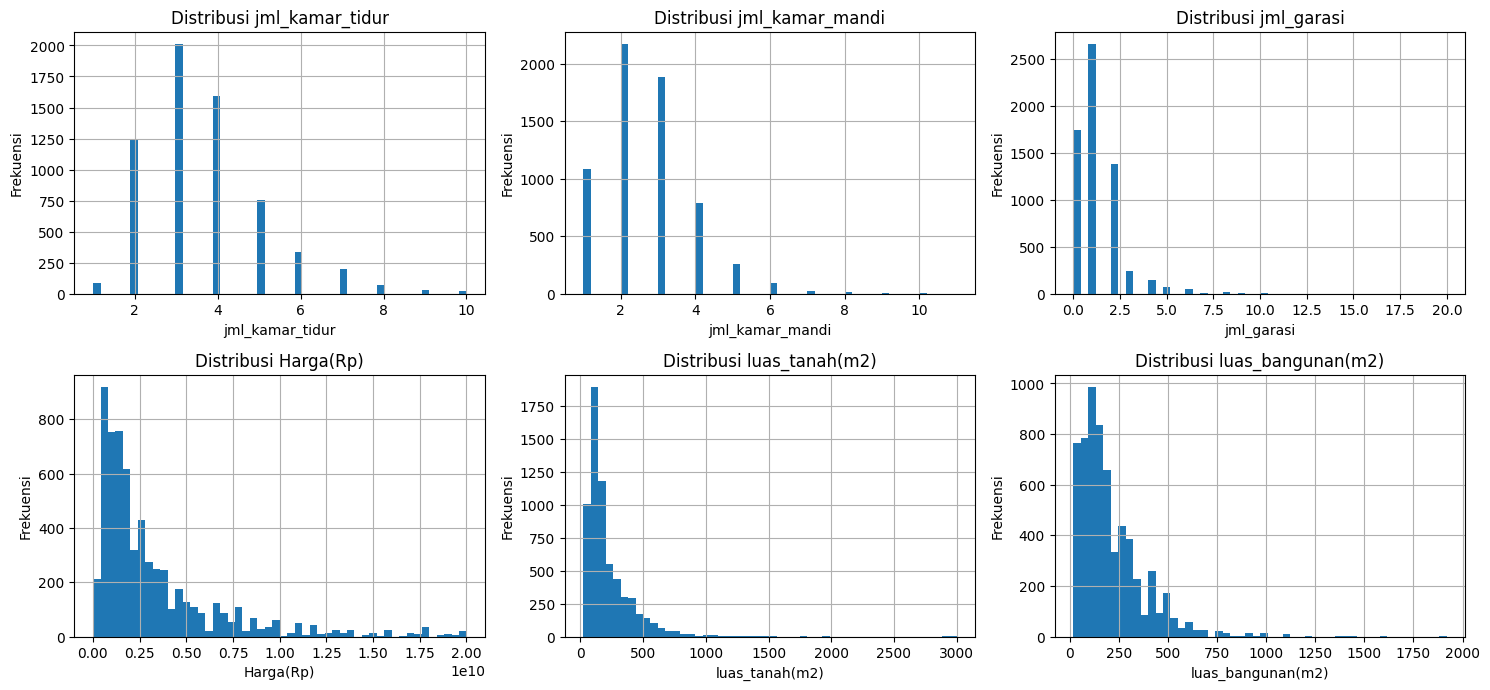

In [24]:
# Distribusi Nilai Numerik
numeric_cols = [
    'jml_kamar_tidur', 'jml_kamar_mandi', 'jml_garasi',
    'Harga(Rp)', 'luas_tanah(m2)', 'luas_bangunan(m2)',
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    df[col].hist(bins=50)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
plt.show()

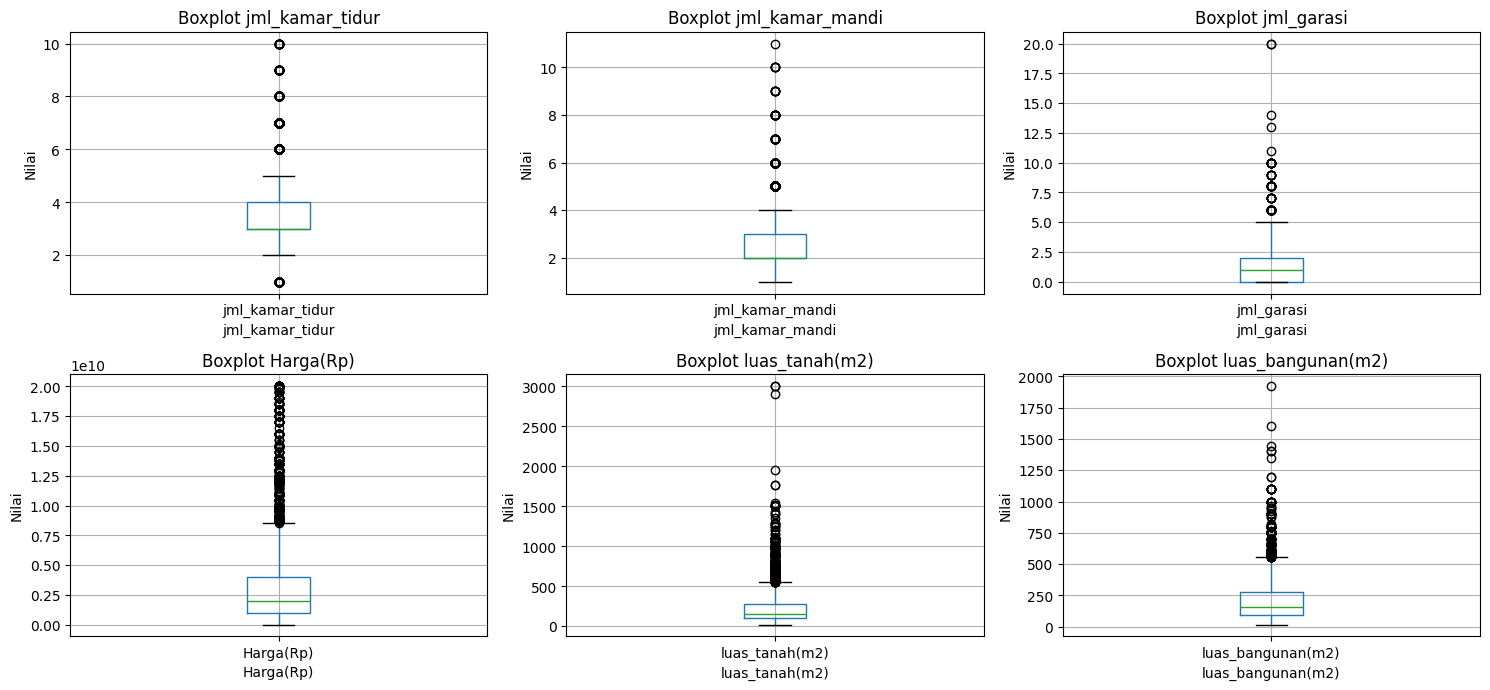

In [25]:
# Boxplot nilai numerik
numeric_cols = [
    'jml_kamar_tidur', 'jml_kamar_mandi', 'jml_garasi',
    'Harga(Rp)', 'luas_tanah(m2)', 'luas_bangunan(m2)'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    df.boxplot(column=col)
    plt.title(f'Boxplot {col}')
    plt.xlabel(col)
    plt.ylabel('Nilai')
    plt.tight_layout()
plt.show()

### Kesimpulan Distribusi dan Boxplot :

1. Distribusi (Histogram)
Menunjukkan sebaran frekuensi data:
- Dominasi Data: Mayoritas rumah memiliki 3 kamar tidur, 2 kamar mandi, dan 1 garasi.
- Kemiringan (Skewness): Ketiga grafik bawah (Harga, Luas Tanah, Luas Bangunan) menunjukkan kemiringan positif yang ekstrem (Right-Skewed). Artinya, mayoritas properti berada di harga dan luas rendah, namun ada segelintir data dengan nilai sangat tinggi yang menarik grafik ke kanan.

2. Boxplot
Menunjukkan variasi, kuartil, dan anomali data:
- Outlier (Pencilan): Titik-titik hitam di atas garis whisker menunjukkan banyaknya outlier. Ini mengonfirmasi adanya properti "Sultan" yang harganya jauh melampaui rata-rata pasar.
- Untuk mengatasinya, nanti akan dilalukan limit nilai untuk masuk kategori sultan, sehingga tidak mengganggu distribusi residensial.
- Rentang Interkuartil (IQR): Kotak biru menunjukkan bahwa 50% data terkonsentrasi di rentang nilai yang sempit.
- Median: Garis hijau di dalam kotak menunjukkan nilai tengah. Terlihat median harga berada di angka yang jauh lebih rendah dibandingkan nilai maksimumnya, menandakan ketimpangan harga yang besar dalam dataset. Hal ini wajar dalam konteks harga Rumah karena terdapat data rumah yang termasuk Megah/Sultan

## 3.6. Membuat Variabel `Luas Efektif` dan `Kapasitas Fasilitas`

- **Luas efektif** adalah variabel input dimana variabel ini diambil dari `luas_tanah(m2)` + `luas_bangunan(m2)`
- **Kapasitas Fasilitas** adalah variabel input dimana variabel ini diambil dari `jml_kamar_tidur` + `jml_kamar_mandi` + `jml_garasi`

In [26]:
df['Luas Efektif'] = df['luas_tanah(m2)'] + df['luas_bangunan(m2)']
df['Kapasitas Fasilitas'] = df['jml_kamar_tidur'] + df['jml_kamar_mandi'] + df['jml_garasi']

display(df.head())

,house_name,location,jml_kamar_tidur,jml_kamar_mandi,jml_garasi,Harga(Rp),luas_tanah(m2),luas_bangunan(m2),Luas Efektif,Kapasitas Fasilitas
0,Rumah 2 Lantai Bagus Sertifikat Hak Milik di M...,"Andir, Bandung",3,2,2,2100000000,137,170,307,7
1,Rumah Cantik @ Andir (Sudirman),"Andir, Bandung",3,2,3,4100000000,202,300,502,8
5,"Rumah 2,5 Lantai Strategis SHM di Komplek Kert...","Andir, Bandung",5,3,1,3600000000,184,234,418,9
6,Rumah Bagus Semi Furnished Gateway Residence G...,"Andir, Bandung",2,1,1,1170000000,65,45,110,4
8,Rumah Nyaman Di Tengah Kota dan Pusat Keramaian,"Andir, Bandung",5,3,2,4500000000,404,250,654,10


In [27]:
# Meneliti data setelah membuat variabel input
df.describe()

,jml_kamar_tidur,jml_kamar_mandi,jml_garasi,Harga(Rp),luas_tanah(m2),luas_bangunan(m2),Luas Efektif,Kapasitas Fasilitas
count,6332.000000,6332.000000,6332.000000,6.332000e+03,6332.000000,6332.000000,6332.000000,6332.000000
mean,3.659349,2.606601,1.239577,3.292994e+09,217.820436,208.849337,426.669773,7.505527
std,1.463515,1.225553,1.331819,3.520473e+09,193.482027,166.382150,335.934274,3.094490
min,1.000000,1.000000,0.000000,1.200000e+07,22.000000,18.000000,51.000000,2.000000
25%,3.000000,2.000000,0.000000,1.000000e+09,99.000000,96.000000,200.000000,5.000000
50%,3.000000,2.000000,1.000000,2.000000e+09,153.000000,160.000000,320.000000,7.000000
75%,4.000000,3.000000,2.000000,4.000000e+09,280.000000,280.000000,552.000000,9.000000
max,10.000000,11.000000,20.000000,2.000000e+10,3000.000000,1920.000000,4824.000000,34.000000


## 3.7. **Menyimpan Dataframe menjadi dataset_final.csv**


In [28]:
df.to_csv(
    "dataset_final.csv",
    index=False,
    encoding="utf-8"
)

print("Dataset berhasil disimpan sebagai dataset_final.csv")

Dataset berhasil disimpan sebagai dataset_final.csv


## 3.8. **Kesimpulan**:
- Data bersih tidak ada missing value
- Tipe data sudah sesuai, seperti nilai numerik menggunakan `int64`
- Nilai max `jml_kamar_tidur` mendekati `99` merupakan hal wajar karena properti tersebut adalah `Kos` dan `Hotel`
- Data yang merupakan anomali sudah dibersihkan agar tidak mengganggu proses fuzzy.
- Menghapus data properti komersial karena fokus ke rumah residensial.

# 4.Mendefinisikan Variabel Fuzzy

- Menentukan ruang lingkup dan himpunan fuzzy (misalnya, `Rendah`, `Sedang`, `Tinggi`)
- Menentukan Fungsi keanggotaan masing-masing untuk setiap variabel `input` (`Luas Efektif`, `Kapasitas Fasilitas`, `Harga`)
- Menentukan Fungsi variabel `output` (`Indeks Kewajaran`).


In [29]:
# Membuat range data valid

luas_efektif_min = df['Luas Efektif'].min()
luas_efektif_max = df['Luas Efektif'].max()
kapasitas_fasilitas_min = df['Kapasitas Fasilitas'].min()
kapasitas_fasilitas_max = df['Kapasitas Fasilitas'].max()
harga_min = df['Harga(Rp)'].min()
harga_max = df['Harga(Rp)'].max()

print(f"Luas Efektif Range: {luas_efektif_min} - {luas_efektif_max}")
print(f"Kapasitas Fasilitas Range: {kapasitas_fasilitas_min} - {kapasitas_fasilitas_max}")
print(f"Harga(Rp) Range: {harga_min} - {harga_max}")

Luas Efektif Range: 51 - 4824
Kapasitas Fasilitas Range: 2 - 34
Harga(Rp) Range: 12000000 - 20000000000


Setelah mengetahui batasan angka untuk setiap variabel, langkah selanjutnya adalah menetapkan cakupan nilai untuk variabel `input` dan `output`. Saya akan membuat objek `ControlVariable` untuk mengaturnya.

Agar data tetap ringkas dan mudah diolah, variabel dengan rentang nilai yang sangat besar seperti `Luas Efektif` dan `Harga` akan dibuat menggunakan np.linspace (metode untuk membagi rentang menjadi beberapa titik tetap). Hal yang sama juga dilakukan pada variabel `Kapasitas Fasilitas` dan `Indeks Kewajaran` supaya definisinya konsisten. Selain itu, kami akan memastikan nilai terendah `Luas Efektif` dimulai dari 0, karena luas bangunan tidak mungkin bernilai negatif."

In [30]:
# --- 1. UNIVERSE ---
harga_limit = 20000000000       # Limit harga rumah
luas_efektif_limit = 2000       # Limit luas efektif
kapasitas_fasilitas_limit = 25  # Limit jumlah fasilitas

luas_efektif = ctrl.Antecedent(np.linspace(0, luas_efektif_limit, 1000), 'Luas Efektif')
kapasitas_fasilitas = ctrl.Antecedent(np.linspace(0, kapasitas_fasilitas_limit, 200), 'Kapasitas Fasilitas')
harga = ctrl.Antecedent(np.linspace(0, harga_limit, 1000), 'Harga(Rp)')
indeks_kewajaran = ctrl.Consequent(np.linspace(0, 100, 101), 'Indeks Kewajaran')

# --- 2. LUAS EFEKTIF ---
luas_efektif['Kecil'] = fuzz.trapmf(luas_efektif.universe, [0, 0, 100, 250])
luas_efektif['Sedang'] = fuzz.trimf(luas_efektif.universe, [150, 400, 750])
luas_efektif['Besar'] = fuzz.trapmf(luas_efektif.universe, [600, 900, luas_efektif_limit, luas_efektif_limit])

# --- 3. KAPASITAS FASILITAS ---
kapasitas_fasilitas['Kurang'] = fuzz.trapmf(kapasitas_fasilitas.universe, [0, 0, 3, 5])
kapasitas_fasilitas['Cukup'] = fuzz.trimf(kapasitas_fasilitas.universe, [4, 8, 14])
kapasitas_fasilitas['Banyak'] = fuzz.trapmf(kapasitas_fasilitas.universe, [10, 15, kapasitas_fasilitas_limit, kapasitas_fasilitas_limit])

# --- 4. HARGA ---
harga['Murah'] = fuzz.trapmf(harga.universe, [0, 0, 900000000, 1100000000])
harga['Normal'] = fuzz.trimf(harga.universe, [1000000000, 2000000000, 4200000000])
harga['Mahal'] = fuzz.trapmf(harga.universe, [4000000000, 7000000000, harga_limit, harga_limit])

# --- 5. INDEKS KEWAJARAN ---
indeks_kewajaran['Sangat Tidak Wajar'] = fuzz.trimf(indeks_kewajaran.universe, [0, 0, 35])
indeks_kewajaran['Tidak Wajar'] = fuzz.trimf(indeks_kewajaran.universe, [25, 45, 65])
indeks_kewajaran['Cukup Wajar'] = fuzz.trimf(indeks_kewajaran.universe, [55, 70, 85])
indeks_kewajaran['Wajar'] = fuzz.trimf(indeks_kewajaran.universe, [75, 85, 95])
indeks_kewajaran['Sangat Wajar'] = fuzz.trimf(indeks_kewajaran.universe, [85, 100, 100])

## 4.1. Visualisasi Fungsi Keanggotaan Fuzzy



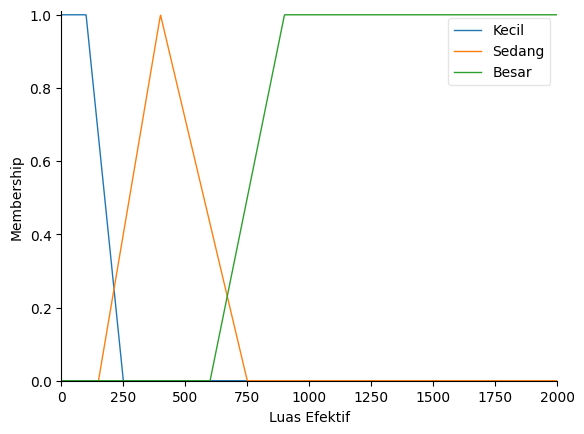

In [ ]:
luas_efektif.view()

1. Luas Efektif ($m^2$)

Menentukan kategori ukuran total properti (akumulasi nilai luas tanah dan luas bangunan).
- Kecil: Di bawah 100 $m^2$ dianggap pasti kecil, dan statusnya hilang sepenuhnya jika luas mencapai 250 $m^2$
- Sedang: Titik paling pas (puncak representatif) berada di angka 400 $m^2$.
- Besar: Mulai dianggap besar sejak 600 $m^2$, dan mencapai status pasti besar pada 900 $m^2$ ke atas.

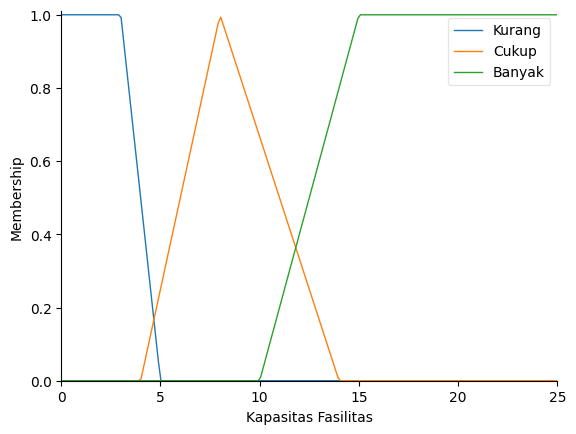

In [ ]:
kapasitas_fasilitas.view()

2. Kapasitas Fasilitas (Unit)

Menilai kelengkapan fasilitas dasar (Jumlah Kamar Tidur + Kamar Mandi + Garasi).
- Kurang: Sangat minim jika di bawah 3 unit, dan batas akhirnya di 5 unit.
- Cukup: Titik paling ideal untuk rumah keluarga standar berada di angka 8 unit.
- Banyak: Mulai dianggap banyak sejak 10 unit, dan pasti banyak di angka 15 unit ke atas.

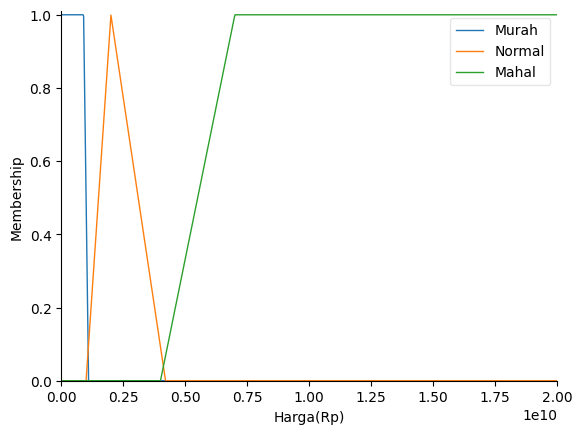

In [ ]:
harga.view()

3. Harga (Rp)

Mengklasifikasikan nilai properti berdasarkan data statistik pasar residensial (Q1, Median, Q3).
- Murah: Pasti murah jika di bawah 900 Juta, dengan batas atas kategori murah di 1,1 Miliar.
- Normal: Titik harga paling umum (Median) berada di 2 Miliar, dengan rentang kewajaran hingga 4,2 Miliar.
- Mahal: Mulai dianggap mahal di atas 4 Miliar, dan mencapai status pasti mahal sejak 7 Miliar hingga batas limit.

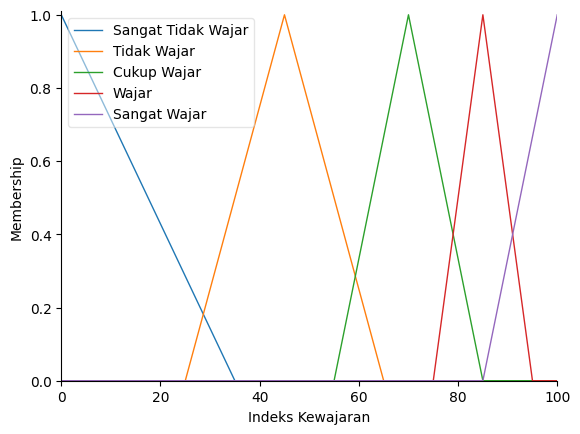

In [ ]:
indeks_kewajaran.view()

4. Indeks Kewajaran (Output 0-100)

Output akhir yang menentukan apakah harga penawaran sebanding dengan spesifikasi aset.
- Sangat Tidak Wajar: Skor di bawah 35. Harga jauh melampaui kualitas (sangat mahal).
- Cukup Wajar: Skor berpusat di angka 70. Harga standar sesuai dengan harga pasar umum.
- Sangat Wajar: Skor di atas 85. Merupakan Best Deal (spesifikasi mewah dengan harga yang sangat rendah).

# 5.Mendefinisikan Aturan Fuzzy


In [31]:
# ATURAN FUZZY (RULES)
rules = [
    # --- Kelompok: SANGAT TIDAK WAJAR (Overpriced Parah) ---
    ctrl.Rule(harga['Mahal'] & luas_efektif['Kecil'], indeks_kewajaran['Sangat Tidak Wajar']),
    ctrl.Rule(harga['Mahal'] & kapasitas_fasilitas['Kurang'], indeks_kewajaran['Sangat Tidak Wajar']),
    ctrl.Rule(harga['Normal'] & luas_efektif['Kecil'] & kapasitas_fasilitas['Kurang'], indeks_kewajaran['Sangat Tidak Wajar']),
    ctrl.Rule(harga['Mahal'] & luas_efektif['Sedang'] & kapasitas_fasilitas['Kurang'], indeks_kewajaran['Sangat Tidak Wajar']),

    # --- Kelompok: TIDAK WAJAR (Kemahalan) ---
    ctrl.Rule(harga['Normal'] & luas_efektif['Kecil'], indeks_kewajaran['Tidak Wajar']),
    ctrl.Rule(harga['Mahal'] & luas_efektif['Sedang'], indeks_kewajaran['Tidak Wajar']),
    ctrl.Rule(harga['Mahal'] & luas_efektif['Besar'] & kapasitas_fasilitas['Kurang'], indeks_kewajaran['Tidak Wajar']),
    ctrl.Rule(harga['Normal'] & luas_efektif['Sedang'] & kapasitas_fasilitas['Kurang'], indeks_kewajaran['Tidak Wajar']),

    # --- Kelompok: CUKUP WAJAR (Harga Pasar / Standar) ---
    ctrl.Rule(harga['Normal'] & luas_efektif['Sedang'] & kapasitas_fasilitas['Cukup'], indeks_kewajaran['Cukup Wajar']),
    ctrl.Rule(harga['Murah'] & luas_efektif['Kecil'] & kapasitas_fasilitas['Kurang'], indeks_kewajaran['Cukup Wajar']),
    ctrl.Rule(harga['Mahal'] & luas_efektif['Besar'] & kapasitas_fasilitas['Cukup'], indeks_kewajaran['Cukup Wajar']),
    ctrl.Rule(harga['Mahal'] & luas_efektif['Besar'] & kapasitas_fasilitas['Banyak'], indeks_kewajaran['Cukup Wajar']),
    ctrl.Rule(harga['Normal'] & luas_efektif['Kecil'] & kapasitas_fasilitas['Banyak'], indeks_kewajaran['Cukup Wajar']),

    # --- Kelompok: WAJAR (Good Deal) ---
    ctrl.Rule(harga['Murah'] & luas_efektif['Kecil'] & kapasitas_fasilitas['Banyak'], indeks_kewajaran['Wajar']),
    ctrl.Rule(harga['Murah'] & luas_efektif['Sedang'] & kapasitas_fasilitas['Kurang'], indeks_kewajaran['Wajar']),
    ctrl.Rule(harga['Normal'] & luas_efektif['Sedang'] & kapasitas_fasilitas['Banyak'], indeks_kewajaran['Wajar']),
    ctrl.Rule(harga['Normal'] & luas_efektif['Besar'] & kapasitas_fasilitas['Cukup'], indeks_kewajaran['Wajar']),
    ctrl.Rule(harga['Murah'] & luas_efektif['Sedang'] & kapasitas_fasilitas['Cukup'], indeks_kewajaran['Wajar']),

    # --- Kelompok: SANGAT WAJAR (Best Deal) ---
    ctrl.Rule(harga['Murah'] & luas_efektif['Besar'], indeks_kewajaran['Sangat Wajar']),
    ctrl.Rule(harga['Murah'] & luas_efektif['Sedang'] & kapasitas_fasilitas['Banyak'], indeks_kewajaran['Sangat Wajar']),
    ctrl.Rule(harga['Normal'] & luas_efektif['Besar'] & kapasitas_fasilitas['Banyak'], indeks_kewajaran['Sangat Wajar']),
    ctrl.Rule(harga['Murah'] & kapasitas_fasilitas['Banyak'], indeks_kewajaran['Sangat Wajar'])
]


print("Aturan Fuzzy Terdefinisikan.")

Aturan Fuzzy Terdefinisikan.


In [32]:
# Fungsi klasifikasi hasil score ke status kewajaran
def get_manual_status(score):
    # Thresholds fuzzy membership functions for Indeks Kewajaran
    if score <= 35:
        return "Sangat Tidak Wajar"
    elif score <= 65:
        return "Tidak Wajar"
    elif score <= 85:
        return "Cukup Wajar"
    elif score <= 95:
        return "Wajar"
    else:
        return "Sangat Wajar"

# 6.Membangun Inferensi Fuzzy

Bangun sistem metode `fuzzy Mamdani` menggunakan variabel fuzzy dan aturan yang telah didefinisikan. Sistem ini akan bertanggung jawab atas proses inferensi fuzzy.


In [33]:
# Membuat Control System
kewajaran_ctrl = ctrl.ControlSystem(rules)
kewajaran_simulation = ctrl.ControlSystemSimulation(kewajaran_ctrl)

print("Fuzzy control system object created.")

Fuzzy control system object created.


# 6.1. Inferensi Sistem Fuzzy

Demo sistem fuzzy dengan memungkinkan user melakukan input  `Luas Efektif` meliputi (Luas Tanah, Luas Bangunan), `Kapasitas Fasilitas` meliputi, dan `Harga` untuk menghitung dan menampilkan `Indeks Kewajaran` (Fairness Index) yang dihasilkan.


Masukkan Luas Tanah (m²)                  : 150
Masukkan Luas Bangunan (m²)               : 110
Masukkan Jumlah Kamar Tidur               : 2
Masukkan Jumlah Kamar Mandi               : 1
Masukkan Jumlah Garasi                    : 1
Masukkan Harga (1500000000 untuk 1.5M)    : 810000000
----------------------------------------
HASIL ANALISIS PROPERTI
----------------------------------------
Luas Efektif     : 260 m2
Total Fasilitas  : 4 unit
Harga Penawaran  : Rp 810,000,000
----------------------------------------
INDEKS KEWAJARAN : 85.00
STATUS           : Cukup Wajar
----------------------------------------


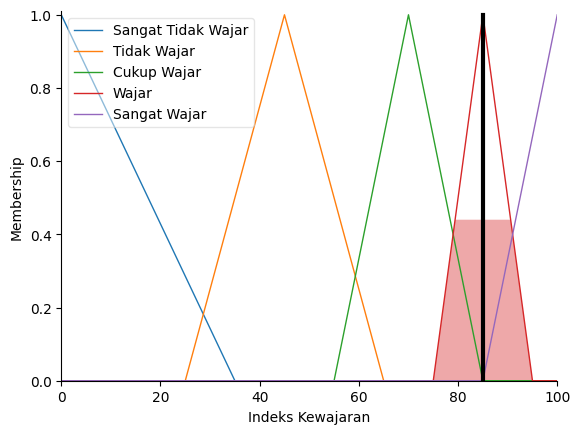

In [36]:
## Output Fuzzy
# 1. User input fitur
luas_tanah_input      = int(input("Masukkan Luas Tanah (m²)                  : "))
luas_bangunan_input   = int(input("Masukkan Luas Bangunan (m²)               : "))
jml_kamar_input       = int(input("Masukkan Jumlah Kamar Tidur               : "))
jml_kamar_mandi_input = int(input("Masukkan Jumlah Kamar Mandi               : "))
jml_garasi_input      = int(input("Masukkan Jumlah Garasi                    : "))
harga_input           = int(input("Masukkan Harga (1500000000 untuk 1.5M)    : "))

# 2. Menghitung Fitur Input
luas_efektif_input = luas_tanah_input + luas_bangunan_input
kapasitas_fasilitas_input = jml_kamar_input + jml_kamar_mandi_input + jml_garasi_input

# 3. Menentukan nilai input untuk sistem fuzzy.
kewajaran_simulation.input['Luas Efektif'] = luas_efektif_input
kewajaran_simulation.input['Kapasitas Fasilitas'] = kapasitas_fasilitas_input
kewajaran_simulation.input['Harga(Rp)'] = harga_input

# 4. Menghitung system fuzzy
kewajaran_simulation.compute()

## Output
# 1. Ambil nilai output
hasil_indeks = kewajaran_simulation.output['Indeks Kewajaran']

# 2. Tentukan Label Kategori berdasarkan nilai indeks
status_final = get_manual_status(hasil_indeks)

# 3. Cetak Output Fuzzy
print("-" * 40)
print(f"HASIL ANALISIS PROPERTI")
print("-" * 40)
print(f"Luas Efektif     : {luas_efektif_input} m2")
print(f"Total Fasilitas  : {kapasitas_fasilitas_input} unit")
print(f"Harga Penawaran  : Rp {harga_input:,.0f}")
print("-" * 40)
print(f"INDEKS KEWAJARAN : {hasil_indeks:.2f}")
print(f"STATUS           : {status_final}")
print("-" * 40)

# 4. Visualisasi Fuzzy
indeks_kewajaran.view(sim=kewajaran_simulation)
plt.show()